##  ライブラリの読み込み

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
import pprint
# pprint.pprint(sys.path)
sys.path.append('/Users/kawashimayuuki/JupyterLab/finance_machine_learning/Section2')

from function import *

## データ作成

In [9]:
code = '3994.T' # マネーフォワード
day_length = 30 # 30日分
minite_type = 5　# 5分足のデータを取得

df = make_data(code, day_length, minite_type)

print('欠損値の確認')
print(df.isnull().sum())
print('データの形状', df.shape)

欠損値の確認
TimeStamp      0
High         217
Low          217
Open         217
Close        217
Volume       217
dtype: int64
データの形状 (1512, 6)


In [12]:
def make_dollar_bar(df, threshold):
    df_dropped = df.dropna().reset_index(drop=True)
    print('欠損値削除後', df_dropped.shape)
    data_length = df_dropped.shape[0]
    data_list  = []
    df_dropped_list = df_dropped.to_dict('record')
    price = 0
    for i in range(data_length):
        close_data = df_dropped_list[i]['Close']
        volume_data = df_dropped_list[i]['Volume']
        price += close_data * volume_data
        if price > threshold:
            data_list.append(df_dropped_list[i])
            price = 0
    return pd.DataFrame(data_list)

In [13]:
dollar_df = make_dollar_bar(df, 100000000)
dollar_df.shape

欠損値削除後 (1295, 6)


/var/folders/5d/q3j1994j7fl4_bhlhckfnjdh0000gn/T/ipykernel_1471/3003941201.py:6: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  df_dropped_list = df_dropped.to_dict('record')


(625, 6)

## リターンの作成

In [14]:
df_dropped = df.dropna().reset_index(drop=True)
df_dropped['PrevClose'] = df_dropped['Close'].shift(1)
df_dropped['CloseReturn'] = (df_dropped['Close'] - df_dropped['PrevClose']) / df_dropped['PrevClose']

dollar_df['PrevClose'] = dollar_df['Close'].shift(1)
dollar_df['CloseReturn'] = (dollar_df['Close'] - dollar_df['PrevClose']) / dollar_df['PrevClose']

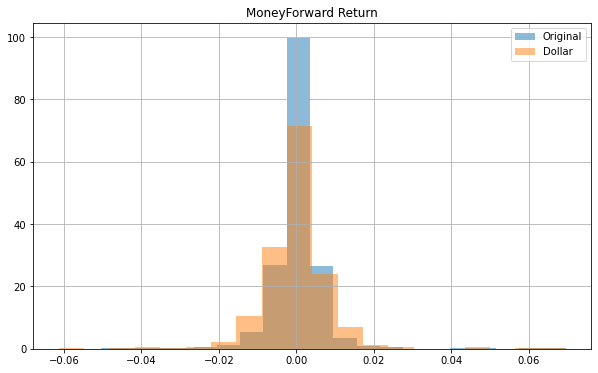

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(df_dropped['CloseReturn'].values, alpha=0.5, bins=20, density=True, label='Original')
plt.hist(dollar_df['CloseReturn'].values, alpha=0.5, bins=20, density=True, label='Dollar')
plt.legend()
plt.title('MoneyForward Return')
plt.grid(True)
plt.show()

## 日次データでも確認

In [17]:
import datetime
import pandas_datareader.data as web

In [38]:
toyota_code = '7203.T'
start = datetime.date(2012, 1, 1)
end = datetime.date(2022, 3, 30)

day_df = web.DataReader(toyota_code, 'yahoo', start, end)
print('欠損値の確認')
print(day_df.isnull().sum())
print('形状の確認', day_df.shape)

欠損値の確認
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64
形状の確認 (2526, 6)


In [39]:
day_df.reset_index(inplace=True)
day_df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-04,530.799988,520.000000,522.200012,528.799988,49682000.0,369.688965
1,2012-01-05,531.799988,526.599976,529.200012,528.799988,39275500.0,369.688965
2,2012-01-06,529.000000,523.599976,528.799988,527.599976,31668500.0,368.850037
3,2012-01-10,529.400024,524.599976,528.000000,525.200012,23590500.0,367.172211
4,2012-01-11,527.599976,522.000000,526.000000,525.200012,18792000.0,367.172211


In [40]:
threshold = 100000000000
day_dollar_df = make_dollar_bar(day_df, threshold)
day_dollar_df.shape

欠損値削除後 (2526, 7)


/var/folders/5d/q3j1994j7fl4_bhlhckfnjdh0000gn/T/ipykernel_1471/3003941201.py:6: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  df_dropped_list = df_dropped.to_dict('record')


(963, 7)

In [41]:
day_dollar_df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-13,529.599976,523.000000,523.000000,527.400024,35402000.0,368.710236
1,2012-01-23,551.400024,543.400024,547.799988,544.000000,26528500.0,380.315460
2,2012-01-27,577.400024,566.400024,576.200012,567.599976,51224500.0,396.814423
3,2012-02-03,588.000000,578.799988,583.799988,579.799988,34523500.0,405.343567
4,2012-02-09,630.000000,621.000000,627.000000,626.000000,50810000.0,437.642395


In [42]:
day_df_dropped = day_df.dropna().reset_index(drop=True)
day_df_dropped['PrevClose'] = day_df_dropped['Close'].shift(1)
day_df_dropped['CloseReturn'] = (day_df_dropped['Close'] - day_df_dropped['PrevClose']) / day_df_dropped['PrevClose']

day_dollar_df['PrevClose'] = day_dollar_df['Close'].shift(1)
day_dollar_df['CloseReturn'] = (day_dollar_df['Close'] - day_dollar_df['PrevClose']) / day_dollar_df['PrevClose']

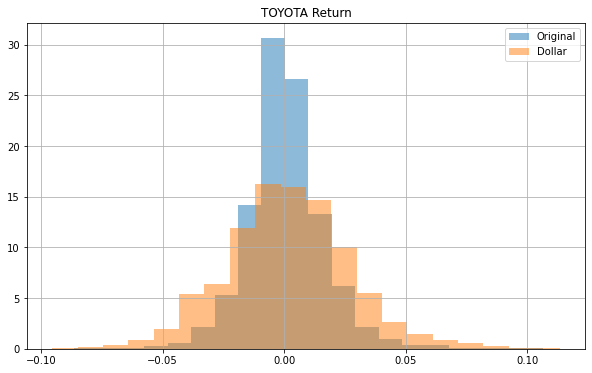

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(day_df_dropped['CloseReturn'].values, alpha=0.5, bins=20, density=True, label='Original')
plt.hist(day_dollar_df['CloseReturn'].values, alpha=0.5, bins=20, density=True, label='Dollar')
plt.legend()
plt.title('TOYOTA Return')
plt.grid(True)
plt.show()